In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import glob, os
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('C:/Users/ghazianramadhan.ar/Downloads/Misc/Take Home Assessment - Senior Data Analyst/Take Home Assessment - Transaction Data - edited.csv')
df.head(5)

,user_tx_id,user_id,city,country,occupation,tx_type,tx_scope,status,tx_amount,fee_amount,...,tax_type,exchange_rate,currency_name,created_at,date,month,volume,volume_usd,fee_usd,tax_usd
0,B8gD6TZ7F5uO3BpjRVQqUw==,dt5tfZxwRPeVZBpWxJLfxkaIKJwwvNjrvy6k23E8Mik=,KABUPATEN BANDUNG,INDONESIA,WIRASWASTA,withdraw,fiat,success,2.226033e+07,396072.4247,...,NaN,8.801609e+01,IDR,2023-11-01 00:00:49.8491 UTC,2023-11-01,11,1.959267e+09,1.306178e+05,26.404828,0.0
1,PJkuawEIUZYQ+JrNU9O34w==,o9cT/Ldyl5LFdUne1BgevKaFKiqS0I05iORmwQPUZ4E=,LOMBOK BARAT,INDONESIA,WIRASWASTA,stake,staking,success,6.107174e+00,0.0000,...,NaN,3.713399e+05,PTU,2023-11-01 00:03:55.254815 UTC,2023-11-01,11,2.267837e+06,1.511892e+02,0.000000,0.0
2,IdY5VG7Svf7jCaI8W+zcbQ==,P9rokiZYG233lyKft4UjLOzkdaiufuzLc/+XxIoQUH0=,PONTIANAK,INDONESIA,WIRASWASTA,referral_commission,referral_commission,success,2.024370e+03,0.0000,...,NaN,8.801609e+01,IDR,2023-11-01 00:04:02.824259 UTC,2023-11-01,11,1.781772e+05,1.187848e+01,0.000000,0.0
3,G5NPF03avHykcJhd1F7slw==,G27EWWWWRxYH78Y04IKBm8Y4OBMpvIl7HSuvsCL4wl4=,BANDUNG,INDONESIA,WIRASWASTA,earn_withdrawal,earn,success,8.397290e+00,0.0000,...,NaN,4.844330e+10,BTC,2023-11-01 00:04:12.836091 UTC,2023-11-01,11,4.067920e+11,2.711950e+07,0.000000,0.0
4,jCly6PgtD8Hl8jQBjqCTbA==,1SrqlneIgOLg//M3qM6ln2MPNr80P994qJ422JRiGUA=,JAKARTA BARAT,INDONESIA,KARYAWAN SWASTA,debit-locked_earn_deposit,locked_earn_deposit,success,1.735778e+02,0.0000,...,NaN,8.886985e+05,MATIC,2023-11-01 00:05:11.983669 UTC,2023-11-01,11,1.542583e+08,1.028389e+04,0.000000,0.0


In [3]:
df.columns

Index(['user_tx_id', 'user_id', 'city', 'country', 'occupation', 'tx_type',
       'tx_scope', 'status', 'tx_amount', 'fee_amount', 'tax_amount',
       'tax_type', 'exchange_rate', 'currency_name', 'created_at', 'date',
       'month', 'volume', 'volume_usd', 'fee_usd', 'tax_usd'],
      dtype='object')

In [4]:
df_scope = df[df['status']=='success'].groupby(['user_id','occupation','city','tx_scope']).agg({'user_tx_id':['count'],'volume_usd':['sum'],'date':['max']}).reset_index().droplevel(1,axis=1)
df_scope.sample(10)

,user_id,occupation,city,tx_scope,user_tx_id,volume_usd,date
36744,rXFeWA+cypnUbHzlGzcGQZev8gyZyITX+7fpCbtopRQ=,PELAJAR/MAHASISWA,KEBUMEN,staking,1,3.845933e+02,2023-11-04
41920,z2PZqdtfGtrF8DDMZCmjWeomcpI1Xj6mRKfCMGiJETE=,KARYAWAN SWASTA,BEKASI,wallet,1,8.099349e+04,2023-11-21
1777,0euhJiXFow9gG0qQvIGcYzxpG6KjKz9PMR3Qm3+ACEg=,BELUM/TIDAK BEKERJA,KUTAI TIMUR,locked_earn_disburse,1,2.530752e-01,2023-12-03
23593,Xq4JB/k4UI6L7iQ1OGRfAUfqYJTGzKRpGNcvTRUJiW8=,KARYAWAN SWASTA,PALOPO,fiat,1,3.098733e+06,2023-11-11
19032,QqbxAhAe0IwNkmf+JyptYljxX+IYj4hEkJV2c6a/sM0=,KARYAWAN SWASTA,CILACAP,referral_commission,1,1.820506e+03,2023-11-03
10490,DlGPxu9L5h3jZmyhZcL3ZSDMoH87woc5dqeA8M0FFLg=,PELAJAR/MAHASISWA,PONOROGO,wallet,1,5.123785e+05,2023-12-25
37930,tAm8VLjpw+Q1cWDOezmK83zh/km7a+Z4xd6qZmKkqj4=,KARYAWAN SWASTA,JAKARTA BARAT,wallet,1,1.291139e+05,2023-11-21
7276,8zgAqtlKGunT5fxScJIuTrBM4/dNiL+8KmdRVMOWQpo=,PELAJAR/MAHASISWA,KABUPATEN ACEH TENGGARA,staking,1,4.379026e+03,2023-12-17
26197,btAJ4/4CNFBqjahJM4Qwkf3IjZIYmHdCMLkDZFLjLQc=,KARYAWAN SWASTA,KOTA SURABAYA,referral_commission,2,1.201276e+03,2023-12-04
30123,his905TGU0Q4bSvJ7XJ/rjjAZwKY12FR0i1EnVKJcnU=,BELUM/TIDAK BEKERJA,BOJONEGORO,wallet,2,2.325365e+06,2023-12-01


In [5]:
df_rfm = df[df['status']=='success'].groupby(['user_id','occupation','city']).agg({'user_tx_id':['count'],'volume_usd':['sum'],'date':['max']}).reset_index().droplevel(1,axis=1)
df_rfm.sample(10)

,user_id,occupation,city,user_tx_id,volume_usd,date
25955,xUSaOrTNr5+UaCJbeDpaoa/IX/eQceN5OSxQVDczj6A=,PEKERJAAN LAINNYA,GRESIK,3,5.474542e+04,2023-12-24
22123,oX4BMvcn44EdZMp/eslrwDEpmU4P22/WeF6l0txuyOw=,KARYAWAN SWASTA,SURABAYA,36,7.698334e+05,2023-12-30
9721,LCMJjkONFEFljQS1AQEMTolJV7lGLDpgNs/OmSldgvI=,KARYAWAN SWASTA,KARAWANG,1,1.264077e+04,2023-12-09
5251,AYDGfe+TKKRSkrrsS0Tg4HgIwM1iWEH+ERV5IbQwF2Q=,KARYAWAN SWASTA,TANGERANG,3,7.035389e+05,2023-12-12
6480,DMLyq2BT8xHYMIzNlGzIa0RjcwhHxNu3cj9uK3r5lHA=,PELAJAR/MAHASISWA,BADUNG,1,1.291198e+06,2023-12-05
12477,Rj8qDFAi3+/a2jaKXVtiFYw9Bt5QJHfY9Vy4HR/USgU=,KARYAWAN SWASTA,Los Angeles,1,7.877971e+07,2023-11-20
17965,ejLbrO2GnDomA9Crvw924ALnx5hvue9D7IfEzbUhOHc=,KARYAWAN SWASTA,TANGERANG,2,9.203237e+02,2023-12-30
26109,xqqDKyMrMiunPsdaddC5taIPg3WFFEzLZKl7e6VjHaA=,PELAJAR/MAHASISWA,KAB. SIMALUNGUN,5,1.173628e+05,2023-12-23
18686,gRn44fNRKm2d8EEbCaoLaCEq3ISIkX5lzwLmwqEwROk=,KARYAWAN SWASTA,MAKASSAR,3,1.243197e+06,2023-12-03
3473,6QG2nai1lIRLojlSYz/yvYLiTj7JYjFx2faIohuKuco=,KARYAWAN SWASTA,LAMPUNG TENGAH,1,1.112445e+07,2023-11-02


In [6]:
df_rfm['today'] = np.array(max(df_rfm['date']))
df_rfm['date'] = pd.to_datetime(df_rfm['date'])
df_rfm['today'] = pd.to_datetime(df_rfm['today'])
df_rfm['recency'] = (df_rfm['today'] - df_rfm['date']).dt.days
df_rfm.rename(columns={'user_tx_id': 'frequency', 'volume_usd': 'monetary'}, inplace=True)
df_rfm.drop(['date','today'], axis=1, inplace=True)
df_rfm['monetary'] = round(df_rfm['monetary'],0)
df_rfm.head(5)

df_rfm.head(5)

,user_id,occupation,city,frequency,monetary,recency
0,++/BmtNc/Gaye0Jewc+vaHWLaIQACpOf5zVyKdwj8Cw=,BELUM/TIDAK BEKERJA,KEPULAUAN YAPEN,6,23475.0,27
1,++6qUAEt7J3GGkONsSlPIgIFjIgeTS2yrbcKYWBjPp8=,KARYAWAN SWASTA,KAB LAMONGAN,1,37691.0,42
2,++7MPgP/36mB6DC6ntUow6lGzfVouRXnejK49XyHPN4=,WIRASWASTA,SUKOHARJO,1,39420.0,49
3,++L4zvITR9fYVmXM+CHARGjwO1Qlq1UFp8Qw62XeDW8=,WIRASWASTA,TANJUNG JABUNG BARAT,2,135789.0,55
4,++MsCl8kC6nAH9jHnKY31YNCk9bY/wvd4PKLLgzM/nE=,BURUH HARIAN LEPAS,KABUPATEN BANYUMAS,2,297295.0,42


In [7]:
df_scope['today'] = np.array(max(df_scope['date']))
df_scope['date'] = pd.to_datetime(df_scope['date'])
df_scope['today'] = pd.to_datetime(df_scope['today'])
df_scope['recency'] = (df_scope['today'] - df_scope['date']).dt.days
df_scope.rename(columns={'user_tx_id': 'frequency', 'volume_usd': 'monetary'}, inplace=True)
df_scope.drop(['date','today'], axis=1, inplace=True)
df_scope['monetary'] = round(df_scope['monetary'],0)
df_scope.head(5)

df_scope.head(5)

,user_id,occupation,city,tx_scope,frequency,monetary,recency
0,++/BmtNc/Gaye0Jewc+vaHWLaIQACpOf5zVyKdwj8Cw=,BELUM/TIDAK BEKERJA,KEPULAUAN YAPEN,earn,5,19187.0,27
1,++/BmtNc/Gaye0Jewc+vaHWLaIQACpOf5zVyKdwj8Cw=,BELUM/TIDAK BEKERJA,KEPULAUAN YAPEN,staking,1,4288.0,36
2,++6qUAEt7J3GGkONsSlPIgIFjIgeTS2yrbcKYWBjPp8=,KARYAWAN SWASTA,KAB LAMONGAN,trading,1,37691.0,42
3,++7MPgP/36mB6DC6ntUow6lGzfVouRXnejK49XyHPN4=,WIRASWASTA,SUKOHARJO,wallet,1,39420.0,49
4,++L4zvITR9fYVmXM+CHARGjwO1Qlq1UFp8Qw62XeDW8=,WIRASWASTA,TANJUNG JABUNG BARAT,trading,2,135789.0,55


In [8]:
r_25 = df_rfm['recency'].quantile(0.25)
r_50 = df_rfm['recency'].quantile(0.5)
r_75 = df_rfm['recency'].quantile(0.75)
m_25 = df_rfm['monetary'].quantile(0.25)
m_50 = df_rfm['monetary'].quantile(0.5)
m_75 = df_rfm['monetary'].quantile(0.75)
f_25 = df_rfm['frequency'].quantile(0.25)
f_50 = df_rfm['frequency'].quantile(0.5)
f_75 = df_rfm['frequency'].quantile(0.75)


df_rfm['r_quartile'] = np.where(df_rfm['recency'] <= r_25 , 3,
                       np.where(df_rfm['recency'] <= r_50 , 2,
                       np.where(df_rfm['recency'] > r_50 , 1,'')))
df_rfm['f_quartile'] = np.where(df_rfm['frequency'] >= f_75 , 3,
                       np.where(df_rfm['frequency'] >= f_50 , 2,
                       np.where(df_rfm['frequency'] < f_50 , 1,'')))
df_rfm['m_quartile'] = np.where(df_rfm['monetary'] >= m_75 , 3,
                       np.where(df_rfm['monetary'] >= m_50 , 2,
                       np.where(df_rfm['monetary'] < m_50 , 1,'')))

df_rfm['rfm_score'] =  df_rfm.r_quartile.astype(str) + df_rfm.f_quartile.astype(str) + df_rfm.m_quartile.astype(str)

print(r_25,r_50,r_75,f_25,f_50,f_75,m_25,m_50,m_75)
df_rfm.head(5)

8.0 20.0 36.0 1.0 1.0 3.0 25393.0 109523.0 666748.75


,user_id,occupation,city,frequency,monetary,recency,r_quartile,f_quartile,m_quartile,rfm_score
0,++/BmtNc/Gaye0Jewc+vaHWLaIQACpOf5zVyKdwj8Cw=,BELUM/TIDAK BEKERJA,KEPULAUAN YAPEN,6,23475.0,27,1,3,1,131
1,++6qUAEt7J3GGkONsSlPIgIFjIgeTS2yrbcKYWBjPp8=,KARYAWAN SWASTA,KAB LAMONGAN,1,37691.0,42,1,2,1,121
2,++7MPgP/36mB6DC6ntUow6lGzfVouRXnejK49XyHPN4=,WIRASWASTA,SUKOHARJO,1,39420.0,49,1,2,1,121
3,++L4zvITR9fYVmXM+CHARGjwO1Qlq1UFp8Qw62XeDW8=,WIRASWASTA,TANJUNG JABUNG BARAT,2,135789.0,55,1,2,2,122
4,++MsCl8kC6nAH9jHnKY31YNCk9bY/wvd4PKLLgzM/nE=,BURUH HARIAN LEPAS,KABUPATEN BANYUMAS,2,297295.0,42,1,2,2,122


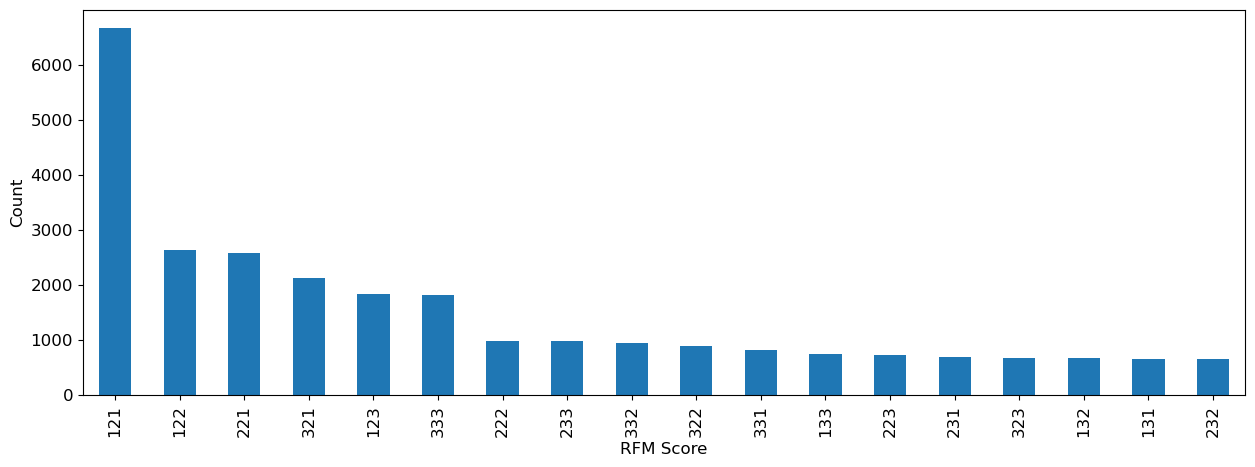

In [9]:
ax = df_rfm['rfm_score'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [15]:
r_25 = df_scope['recency'].quantile(0.25)
r_50 = df_scope['recency'].quantile(0.5)
r_75 = df_scope['recency'].quantile(0.75)
m_25 = df_scope['monetary'].quantile(0.25)
m_50 = df_scope['monetary'].quantile(0.5)
m_75 = df_scope['monetary'].quantile(0.75)
f_25 = df_scope['frequency'].quantile(0.25)
f_50 = df_scope['frequency'].quantile(0.5)
f_75 = df_scope['frequency'].quantile(0.75)


df_scope['r_quartile'] = np.where(df_scope['recency'] <= r_25 , 3,
                       np.where(df_scope['recency'] <= r_50 , 2,
                       np.where(df_scope['recency'] > r_50 , 1,'')))
df_scope['f_quartile'] = np.where(df_scope['frequency'] >= 5 , 3,
                       np.where(df_scope['frequency'] >= 2 , 2,
                       np.where(df_scope['frequency'] < 2 , 1,'')))
df_scope['m_quartile'] = np.where(df_scope['monetary'] >= m_75 , 3,
                       np.where(df_scope['monetary'] >= m_50 , 2,
                       np.where(df_scope['monetary'] < m_50 , 1,'')))

df_scope['rfm_score'] =  df_scope.r_quartile.astype(str) + df_scope.f_quartile.astype(str) + df_scope.m_quartile.astype(str)

print(r_25,r_50,r_75,f_25,f_50,f_75,m_25,m_50,m_75)
df_scope.head(5)

10.0 23.0 40.0 1.0 1.0 2.0 9089.0 58729.0 410173.0


,user_id,occupation,city,tx_scope,frequency,monetary,recency,r_quartile,f_quartile,m_quartile,rfm_score
0,++/BmtNc/Gaye0Jewc+vaHWLaIQACpOf5zVyKdwj8Cw=,BELUM/TIDAK BEKERJA,KEPULAUAN YAPEN,earn,5,19187.0,27,1,3,1,131
1,++/BmtNc/Gaye0Jewc+vaHWLaIQACpOf5zVyKdwj8Cw=,BELUM/TIDAK BEKERJA,KEPULAUAN YAPEN,staking,1,4288.0,36,1,1,1,111
2,++6qUAEt7J3GGkONsSlPIgIFjIgeTS2yrbcKYWBjPp8=,KARYAWAN SWASTA,KAB LAMONGAN,trading,1,37691.0,42,1,1,1,111
3,++7MPgP/36mB6DC6ntUow6lGzfVouRXnejK49XyHPN4=,WIRASWASTA,SUKOHARJO,wallet,1,39420.0,49,1,1,1,111
4,++L4zvITR9fYVmXM+CHARGjwO1Qlq1UFp8Qw62XeDW8=,WIRASWASTA,TANJUNG JABUNG BARAT,trading,2,135789.0,55,1,2,2,122


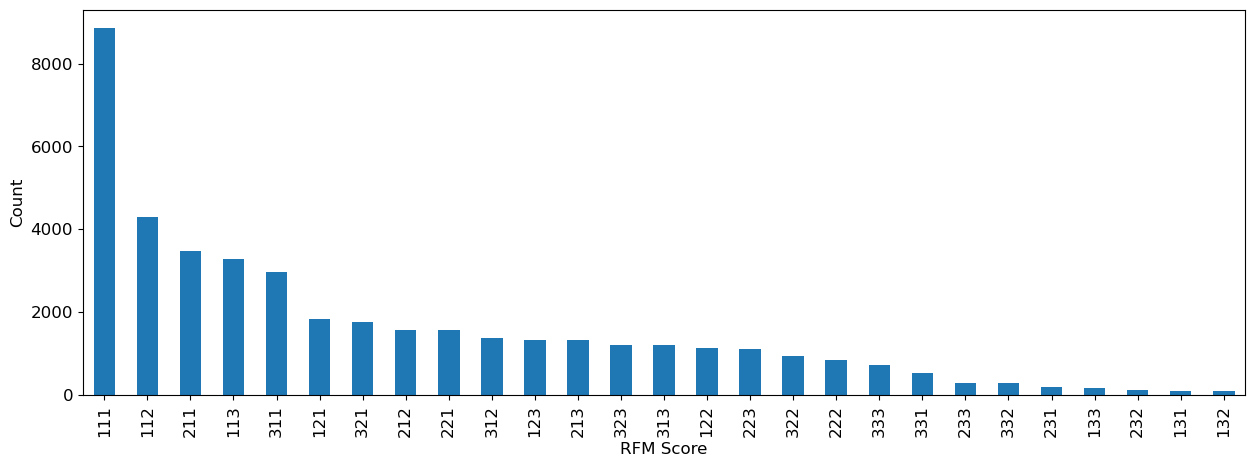

In [16]:
ax = df_scope['rfm_score'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [17]:
df_rfm.to_csv('all.csv')
df_scope.to_csv('scope.csv')
df_scope.groupby(['rfm_score','r_quartile','m_quartile','tx_scope']).agg({'user_id':['count'],'frequency':['mean'],'monetary':['mean'],'recency':['mean']}).reset_index().droplevel(1,axis=1).to_csv('sum.csv')